In [1]:
%load_ext autoreload
%autoreload 2

# Unconditional quantum teleportation between distant solid-state quantum bits

<center><img src="figure_0.png"/></center>

2021-04-06 00:09:11,737 - qm - INFO - Performing health check
2021-04-06 00:09:11,743 - qm - INFO - Health check passed
2021-04-06 00:09:11,845 - qm - INFO - Performing health check
2021-04-06 00:09:11,849 - qm - INFO - Health check passed
2021-04-06 00:09:11,879 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-04-06 00:09:11,905 - qm - INFO - Flags: 
2021-04-06 00:09:11,905 - qm - INFO - Simulating Qua program
2021-04-06 00:09:12,546 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'a-reset' operations
2021-04-06 00:09:12,547 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'b-reset' operations
2021-04-06 00:09:12,547 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'init' operations
2021-04-06 00:09:12,548 - qm - WARNING - pulse 'readoutPulse' used in measure is not part of element 'a-ro' operations
2021-04-06 00:09:12,548 - qm - WARNING - pulse 'readoutPulse' used in measure is not par

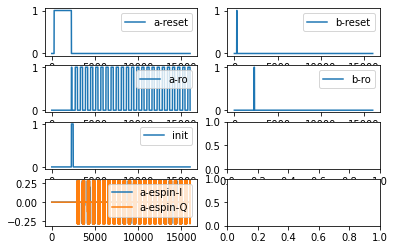

In [112]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
from Configuration import config

import matplotlib.pyplot as plt

meas_len=52
short_meas_len=16

th_a=5
th_b=5
N_max=50
M_max=50

Qmm = QuantumMachinesManager()
Qmm.close_all_quantum_machines()
qm = Qmm.open_qm(config)

with program() as prog:
    A_clicks = declare(int,value=-1)
    B_clicks = declare(int,value=-1)
    N=declare(int,value=0)
    M=declare(int,value=0)
    resultA = declare(int, size=100)
    resultA = declare(int, size=100)

    with while_(A_clicks<0 | B_clicks<0):
        
        play("zeroPulse", "a-reset",duration=500)
        play("zeroPulse", "b-reset",duration=10)
        
        align('a-reset','b-reset','b-ro','a-ro','init')
        play('zeroPulse','init',duration=meas_len)
        measure('readoutPulse','a-ro',None,time_tagging.analog(result1, meas_len,targetLen= A_clicks))
        measure('readoutPulse','b-ro',None,time_tagging.analog(result1, meas_len,targetLen= B_clicks))
    assign(A_clicks,0)
    with while_(A_clicks<=0 ):
        assign(N,N+1)
        play('zeroPulse','a-ro',duration=60)
        align('a-ro','a-espin')
        play('CNOT','a-espin',duration=60)
        measure('short_readoutPulse','a-ro',None,time_tagging.analog(result1, short_meas_len,targetLen= A_clicks))

    
    align('a-reset','b-reset','b-ro','a-ro','init')
        
        

    QMm = QuantumMachinesManager()
QMm.close_all_quantum_machines()

QM1 = QMm.open_qm(config)
job = QM1.simulate(prog, SimulationConfig(int(4000)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
# samples.con1.plot()
fig, axs = plt.subplots(4, 2)
axs[0,0].plot(samples.con1.digital['1'],label='a-reset')
axs[0,0].legend()
axs[1,0].plot(samples.con1.digital['2'],label='a-ro')
axs[1,0].legend()
axs[2,0].plot(samples.con1.digital['3'],label='init')
axs[2,0].legend()
axs[3,0].plot(samples.con1.analog['2'],label='a-espin-I')
axs[3,0].plot(samples.con1.analog['3'],label='a-espin-Q')
axs[3,0].legend()
axs[0,1].plot(samples.con1.digital['4'],label='b-reset')
axs[0,1].legend()
axs[1,1].plot(samples.con1.digital['5'],label='b-ro')
axs[1,1].legend()